In [1]:
import numpy as np 
import pandas as pd 
import math
from datetime import datetime
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from collections import Counter
%matplotlib inline
from pandas import read_csv
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
print (os.getcwd())

/dcs/pg18/u1892296/Downloads/stock_rnn


In [3]:
file_name = os.getcwd() + "/amzn.us.csv"
df = pd.read_csv(file_name)
df = df[-1500:]

print (df)

            Date     Open      High       Low    Close    Volume  OpenInt
3653  2011-11-28   191.92   194.620   190.540   194.15   7166570        0
3654  2011-11-29   195.13   195.500   187.300   188.39   6573777        0
3655  2011-11-30   194.99   195.300   188.750   192.29   7710360        0
3656  2011-12-01   191.78   198.070   191.590   197.13   7323228        0
3657  2011-12-02   197.42   199.660   195.180   196.03   7524821        0
3658  2011-12-05   198.90   199.000   193.670   196.24   5918786        0
3659  2011-12-06   195.91   198.320   190.110   191.99   5201317        0
3660  2011-12-07   191.27   196.710   189.120   195.32   6424177        0
3661  2011-12-08   193.55   195.890   190.080   190.48   4358296        0
3662  2011-12-09   191.77   193.950   188.400   193.03   5156847        0
3663  2011-12-12   190.03   191.150   187.630   189.52   4340029        0
3664  2011-12-13   188.55   189.680   178.500   180.51   9280074        0
3665  2011-12-14   178.58   180.750   

In [4]:
minmax = MinMaxScaler().fit(df.iloc[:, 1:6].astype('float64')) 
df_log = minmax.transform(df.iloc[:, 1:6].astype('float64')) 
df_log = pd.DataFrame(df_log)


print(df_log)

             0         1         2         3         4
0     0.023366  0.020885  0.024627  0.021932  0.270256
1     0.026722  0.021800  0.021241  0.015931  0.244333
2     0.026575  0.021592  0.022756  0.019994  0.294036
3     0.023219  0.024475  0.025724  0.025037  0.277106
4     0.029116  0.026129  0.029475  0.023891  0.285922
5     0.030663  0.025443  0.027897  0.024110  0.215690
6     0.027537  0.024735  0.024177  0.019682  0.184316
7     0.022686  0.023060  0.023143  0.023151  0.237791
8     0.025070  0.022206  0.024146  0.018108  0.147451
9     0.023209  0.020188  0.022391  0.020765  0.182371
10    0.021390  0.017274  0.021586  0.017108  0.146652
11    0.019843  0.015744  0.012047  0.007721  0.362679
12    0.009419  0.006452  0.003427  0.007408  0.463894
13    0.013350  0.010666  0.013123  0.008502  0.273546
14    0.013434  0.010260  0.013938  0.008502  0.248164
15    0.013120  0.008970  0.012569  0.006491  0.153742
16    0.013758  0.008970  0.014178  0.009815  0.156584
17    0.01

In [5]:
close_list = df["Close"].tolist()
c_max = max(close_list)
c_min = min(close_list)
print (c_max - c_min)

959.7800000000001


In [6]:
df_log[3]

0       0.021932
1       0.015931
2       0.019994
3       0.025037
4       0.023891
5       0.024110
6       0.019682
7       0.023151
8       0.018108
9       0.020765
10      0.017108
11      0.007721
12      0.007408
13      0.008502
14      0.008502
15      0.006491
16      0.009815
17      0.001302
18      0.006178
19      0.004355
20      0.003303
21      0.000823
22      0.000792
23      0.000000
24      0.006178
25      0.004595
26      0.004699
27      0.009909
28      0.005689
29      0.006501
          ...   
1470    0.819031
1471    0.816854
1472    0.825554
1473    0.841599
1474    0.850622
1475    0.852164
1476    0.848215
1477    0.856342
1478    0.862521
1479    0.864615
1480    0.868157
1481    0.871064
1482    0.858426
1483    0.847600
1484    0.843745
1485    0.826439
1486    0.836442
1487    0.833326
1488    0.832826
1489    0.966732
1490    0.977047
1491    0.971243
1492    0.969576
1493    0.959720
1494    0.977828
1495    0.987268
1496    0.989883
1497    1.0000

In [7]:
print (type(df_log))

<class 'pandas.core.frame.DataFrame'>


In [8]:
test_size = 75
test_times = 10

df_log_v = df_log.values

df_train = df_log_v[:-test_size, :]
df_test = df_log_v[-test_size:, :]

train_variable = df_train[:, :-1]
train_result = df_train[:, -1]
test_variable = df_test[:, :-1]
test_result = df_test[:, -1]


train_variable = train_variable.reshape((train_variable.shape[0], 1, train_variable.shape[1]))
test_variable = test_variable.reshape((test_variable.shape[0], 1, test_variable.shape[1]))
print(train_variable.shape, train_result.shape, test_variable.shape, test_result.shape)

(1425, 1, 4) (1425,) (75, 1, 4) (75,)


In [9]:
test_result

array([0.29372147, 0.27748439, 0.15637755, 0.13456869, 0.09911694,
       0.07612436, 0.07363421, 0.08322122, 0.11289745, 0.20188164,
       0.10838196, 0.09542195, 0.06814132, 0.0935536 , 0.10879626,
       0.10015351, 0.09494538, 0.07693668, 0.07252352, 0.18394426,
       0.10197861, 0.06970374, 0.08244606, 0.08359874, 0.10235421,
       0.06767354, 0.08790795, 0.04981991, 0.06892386, 0.07010614,
       0.05184499, 0.06517098, 0.1038924 , 0.1274445 , 0.12090804,
       0.10558063, 0.07279386, 0.07737109, 0.05642463, 0.07199382,
       0.18056115, 0.11266345, 0.09444476, 0.0671232 , 0.06678491,
       0.06293888, 0.07340844, 0.06699962, 0.09782949, 0.12213781,
       0.08526668, 0.09169031, 0.05897989, 0.13543782, 0.06310426,
       0.04455952, 0.05826552, 0.06607413, 0.09179772, 0.05935496,
       0.10939597, 0.07552719, 0.08937316, 0.19394128, 0.68070446,
       0.24605109, 0.10891035, 0.12109101, 0.11800216, 0.12091473,
       0.10255952, 0.07425347, 0.06951172, 0.11997446, 0.05215

In [74]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout
from sklearn.model_selection import train_test_split


training_data, validation_data, training_res, validation_res = train_test_split(train_variable, train_result, test_size = 0.1)

model = Sequential()
model.add(LSTM(100, input_shape = (training_data.shape[1], training_data.shape[2]), dropout=0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


In [75]:
trained_model = model.fit(training_data, training_res, epochs=150, batch_size=8,\
                          validation_data=(validation_data, validation_res), shuffle=False)

Train on 1282 samples, validate on 143 samples
Epoch 1/150
1282/1282 [==============================] - 2s 1ms/step - loss: 0.0691 - val_loss: 0.0134
Epoch 2/150
1282/1282 [==============================] - 1s 437us/step - loss: 0.0133 - val_loss: 0.0089
Epoch 3/150
1282/1282 [==============================] - 1s 401us/step - loss: 0.0115 - val_loss: 0.0083
Epoch 4/150
1282/1282 [==============================] - 0s 359us/step - loss: 0.0105 - val_loss: 0.0075
Epoch 5/150
1282/1282 [==============================] - 1s 390us/step - loss: 0.0100 - val_loss: 0.0073
Epoch 6/150
1282/1282 [==============================] - 1s 396us/step - loss: 0.0099 - val_loss: 0.0073
Epoch 7/150
1282/1282 [==============================] - 1s 420us/step - loss: 0.0099 - val_loss: 0.0073
Epoch 8/150
1282/1282 [==============================] - 1s 404us/step - loss: 0.0099 - val_loss: 0.0073
Epoch 9/150
1282/1282 [==============================] - 0s 378us/step - loss: 0.0099 - val_loss: 0.0073
Epoch 10/1

Epoch 78/150
1282/1282 [==============================] - 0s 352us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 79/150
1282/1282 [==============================] - 0s 357us/step - loss: 0.0098 - val_loss: 0.0072
Epoch 80/150
1282/1282 [==============================] - 0s 367us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 81/150
1282/1282 [==============================] - 0s 390us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 82/150
1282/1282 [==============================] - 0s 381us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 83/150
1282/1282 [==============================] - 0s 357us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 84/150
1282/1282 [==============================] - 0s 365us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 85/150
1282/1282 [==============================] - 0s 354us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 86/150
1282/1282 [==============================] - 0s 359us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 87/150
1282/1282 [======================

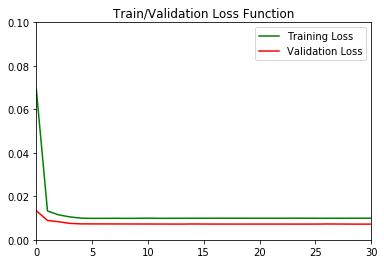

In [76]:
plt.plot(trained_model.history['loss'], color = 'g', label = 'Training Loss')
plt.plot(trained_model.history['val_loss'], color = 'r', label = 'Validation Loss')
plt.title('Train/Validation Loss Function')
plt.axis([0, 30, 0, 0.1])
plt.legend() 
plt.show()


In [77]:
x = model.predict(test_variable)
x

array([[0.11354395],
       [0.11345893],
       [0.11339752],
       [0.11331826],
       [0.11334061],
       [0.11328075],
       [0.11331919],
       [0.11332375],
       [0.11323057],
       [0.11312176],
       [0.11302365],
       [0.11322016],
       [0.11329287],
       [0.11321932],
       [0.11313922],
       [0.11304765],
       [0.11298288],
       [0.11304127],
       [0.11302982],
       [0.11294731],
       [0.11298011],
       [0.11294495],
       [0.11289807],
       [0.11305574],
       [0.11318202],
       [0.1132341 ],
       [0.11312149],
       [0.11309174],
       [0.11318152],
       [0.1131555 ],
       [0.11320306],
       [0.11321453],
       [0.11327247],
       [0.11334279],
       [0.11331932],
       [0.11322918],
       [0.11316284],
       [0.11310203],
       [0.11310917],
       [0.11305631],
       [0.11288688],
       [0.11287969],
       [0.11294841],
       [0.11299682],
       [0.11306087],
       [0.11303835],
       [0.11301549],
       [0.113

In [78]:
def inv_transform(x):
    return x*(c_max - c_min) + c_min

def inv_transform_list(l):
    return [inv_transform(i) for i in l]

In [79]:
stock_price = [inv_transform(i) for i in x]

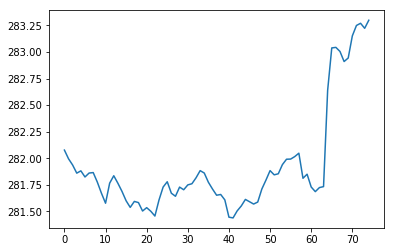

In [80]:
plt.plot(stock_price)
plt.show()

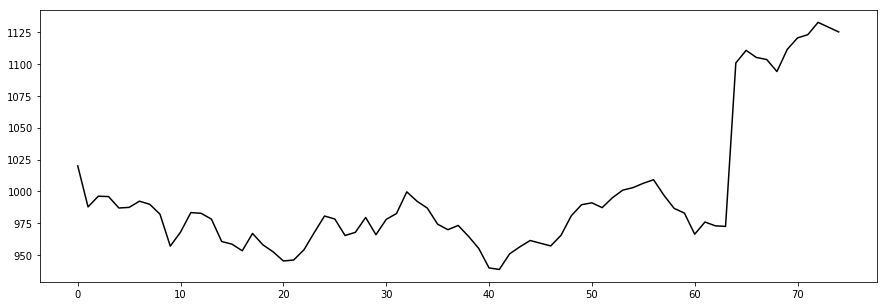

In [71]:
plt.figure(figsize = (15, 5))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.show()

In [81]:
result = []
for i in range(5):
    
    print ('training %d'%(i + 1))
    trained_model = model.fit(training_data, training_res, epochs=150, batch_size=8,\
                          validation_data=(validation_data, validation_res), shuffle=False)
    
    
    prediction = inv_transform_list(model.predict(test_variable))
    result.append(prediction)

training 1
Train on 1282 samples, validate on 143 samples
Epoch 1/150
1282/1282 [==============================] - 0s 367us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 2/150
1282/1282 [==============================] - 0s 372us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 3/150
1282/1282 [==============================] - 0s 388us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 4/150
1282/1282 [==============================] - 0s 363us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 5/150
1282/1282 [==============================] - 0s 364us/step - loss: 0.0098 - val_loss: 0.0071
Epoch 6/150
1282/1282 [==============================] - 0s 370us/step - loss: 0.0098 - val_loss: 0.0071
Epoch 7/150
1282/1282 [==============================] - 1s 417us/step - loss: 0.0099 - val_loss: 0.0072
Epoch 8/150
1282/1282 [==============================] - 1s 407us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 9/150
1282/1282 [==============================] - 0s 367us/step - loss: 0.0099 - val_loss: 0.00

Epoch 78/150
1282/1282 [==============================] - 0s 368us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 79/150
1282/1282 [==============================] - 0s 364us/step - loss: 0.0098 - val_loss: 0.0071
Epoch 80/150
1282/1282 [==============================] - 0s 357us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 81/150
1282/1282 [==============================] - 0s 349us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 82/150
1282/1282 [==============================] - 0s 349us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 83/150
1282/1282 [==============================] - 0s 353us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 84/150
1282/1282 [==============================] - 0s 368us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 85/150
1282/1282 [==============================] - 0s 367us/step - loss: 0.0098 - val_loss: 0.0071
Epoch 86/150
1282/1282 [==============================] - 0s 358us/step - loss: 0.0099 - val_loss: 0.0071
Epoch 87/150
1282/1282 [======================

1282/1282 [==============================] - 0s 343us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 82/150
1282/1282 [==============================] - 0s 350us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 83/150
1282/1282 [==============================] - 0s 355us/step - loss: 0.0099 - val_loss: 0.0069
Epoch 84/150
1282/1282 [==============================] - 0s 342us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 85/150
1282/1282 [==============================] - 0s 347us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 86/150
1282/1282 [==============================] - 0s 356us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 87/150
1282/1282 [==============================] - 0s 356us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 88/150
1282/1282 [==============================] - 0s 364us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 89/150
1282/1282 [==============================] - 0s 346us/step - loss: 0.0099 - val_loss: 0.0069
Epoch 90/150
1282/1282 [==============================] - 0

1282/1282 [==============================] - 0s 368us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 85/150
1282/1282 [==============================] - 0s 359us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 86/150
1282/1282 [==============================] - 0s 353us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 87/150
1282/1282 [==============================] - 0s 345us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 88/150
1282/1282 [==============================] - 0s 351us/step - loss: 0.0099 - val_loss: 0.0069
Epoch 89/150
1282/1282 [==============================] - 0s 361us/step - loss: 0.0098 - val_loss: 0.0069
Epoch 90/150
1282/1282 [==============================] - 0s 341us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 91/150
1282/1282 [==============================] - 0s 341us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 92/150
1282/1282 [==============================] - 0s 351us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 93/150
1282/1282 [==============================] - 0

1282/1282 [==============================] - 0s 375us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 88/150
1282/1282 [==============================] - 0s 359us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 89/150
1282/1282 [==============================] - 0s 359us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 90/150
1282/1282 [==============================] - 0s 350us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 91/150
1282/1282 [==============================] - 0s 374us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 92/150
1282/1282 [==============================] - 0s 352us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 93/150
1282/1282 [==============================] - 0s 369us/step - loss: 0.0097 - val_loss: 0.0068
Epoch 94/150
1282/1282 [==============================] - 0s 351us/step - loss: 0.0097 - val_loss: 0.0068
Epoch 95/150
1282/1282 [==============================] - 0s 352us/step - loss: 0.0097 - val_loss: 0.0068
Epoch 96/150
1282/1282 [==============================] - 0

1282/1282 [==============================] - 0s 201us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 91/150
1282/1282 [==============================] - 0s 188us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 92/150
1282/1282 [==============================] - 0s 194us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 93/150
1282/1282 [==============================] - 0s 179us/step - loss: 0.0097 - val_loss: 0.0068
Epoch 94/150
1282/1282 [==============================] - 0s 184us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 95/150
1282/1282 [==============================] - 0s 181us/step - loss: 0.0097 - val_loss: 0.0068
Epoch 96/150
1282/1282 [==============================] - 0s 179us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 97/150
1282/1282 [==============================] - 0s 181us/step - loss: 0.0097 - val_loss: 0.0068
Epoch 98/150
1282/1282 [==============================] - 0s 180us/step - loss: 0.0098 - val_loss: 0.0068
Epoch 99/150
1282/1282 [==============================] - 0

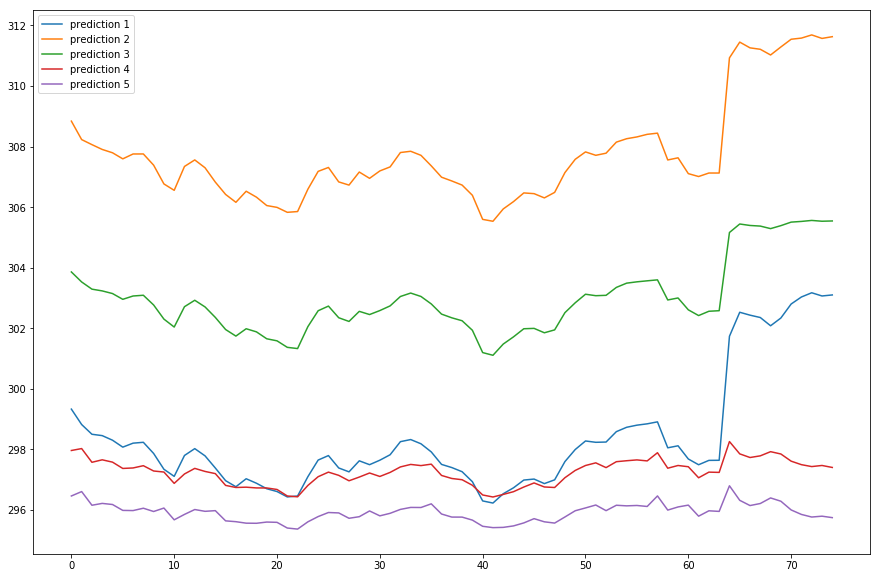

In [85]:
plt.figure(figsize = (15, 10))

for no, r in enumerate(result):
    plt.plot(r, label = 'prediction %d'%(no + 1))
    
plt.legend()
plt.show()

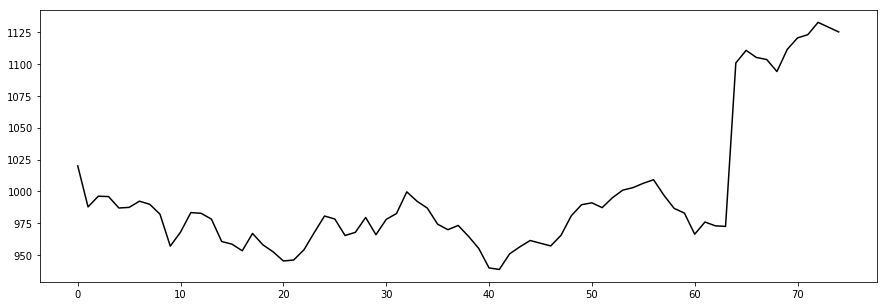

In [43]:
plt.figure(figsize = (15, 5))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.show()